In [5]:
from scipy.stats import norm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

## 1-D Feature Vector - using normal Python

In [6]:
#1-D normal Python
import math

'''Class for Gaussian Kernel Regression'''
class GKR:
    
    def __init__(self, x, y, b):
        self.x = x
        self.y = y
        self.b = b
    
    '''Implement the Gaussian Kernel'''
    def gaussian_kernel(self, z):
        return (1/math.sqrt(2*math.pi))*math.exp(-0.5*z**2)
    
    '''Calculate weights and return prediction'''
    def predict(self, X):
        kernels = [self.gaussian_kernel((xi-X)/self.b) for xi in self.x]
        weights = [len(self.x) * (kernel/np.sum(kernels)) for kernel in kernels]
        return np.dot(weights, self.y)/len(self.x)
    
    def visualize_kernels(self, precision):
        plt.figure(figsize = (10,5))
        for xi in self.x:
            x_normal = np.linspace(xi - 3*self.b, xi + 3*self.b, precision)
            y_normal = norm.pdf(x_normal, xi, self.b)
            plt.plot(x_normal, y_normal, label='Kernel at xi=' + str(xi))
            
        plt.ylabel('Kernel Weights wi')
        plt.xlabel('x')
        plt.legend()
    
    def visualize_predictions(self, precision, X):
        plt.figure(figsize = (10,5))
        max_y = 0
        for xi in self.x:
            x_normal = np.linspace(xi - 3*self.b, xi + 3*self.b, precision)
            y_normal = norm.pdf(x_normal, xi, self.b)
            max_y = max(max(y_normal), max_y)
            plt.plot(x_normal, y_normal, label='Kernel at xi=' + str(xi))
            
        plt.plot([X,X], [0, max_y], 'k-', lw=1,dashes=[2, 2])
        plt.ylabel('Kernel Weights wi')
        plt.xlabel('x')
        plt.legend()

In [7]:
gkr = GKR([10,20,30,40,50,60,70,80,90,100,110,120], [2337,2750,2301,2500,1700,2100,1100,1750,1000,1642, 2000,1932], 10)

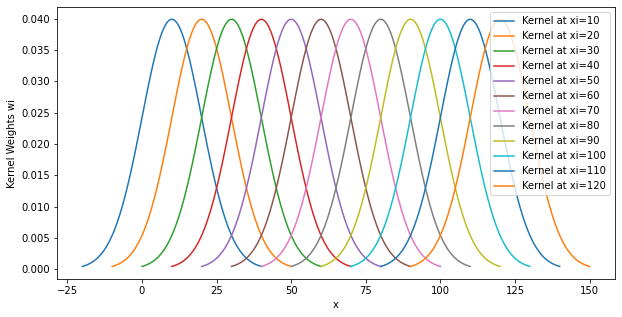

In [8]:
gkr.visualize_kernels(100)

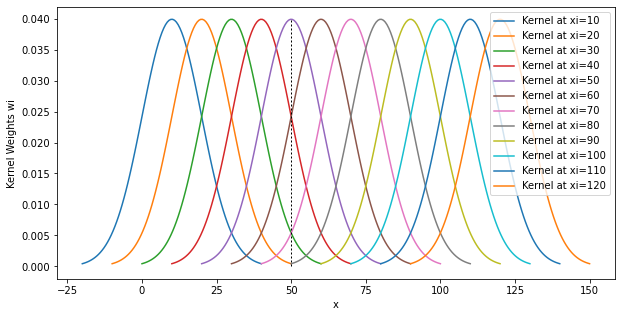

In [9]:
gkr.visualize_predictions(100, 50)

In [10]:
%%time 
gkr.predict(50)

Wall time: 0 ns


1995.2858171576065

In [11]:
%%time
gkr.predict(11)

Wall time: 0 ns


2484.4865230971986

In [12]:
%%time
gkr.predict(100)

Wall time: 0 ns


1592.2006006336358

## N-D Feature Vector - using numpy and Euclidean distance

For N-dimenisonal inputs, the only modification is in the weight calculating equation where we replace $x_i - X$ with the Euclidean distance $||x_i-X||$

In [16]:
# N-dimensional using numpy

from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

'''Class for Gaussian Kernel Regression'''
class GKR:
    
    def __init__(self, x, y, b):
        self.x = np.array(x)
        self.y = np.array(y)
        self.b = b
    
    '''Implement the Gaussian Kernel'''
    def gaussian_kernel(self, z):
        return (1/np.sqrt(2*np.pi))*np.exp(-0.5*z**2)
    
    '''Calculate weights and return prediction'''
    def predict(self, X):
        kernels = np.array([self.gaussian_kernel((np.linalg.norm(xi-X))/self.b) for xi in self.x])
        weights = np.array([len(self.x) * (kernel/np.sum(kernels)) for kernel in kernels])
        return np.dot(weights.T, self.y)/len(self.x)
    
    def visualize_kernels(self):
        zsum = np.zeros((120,120))
        plt.figure(figsize = (10,5))
        ax = plt.axes(projection = '3d')
        for xi in self.x:
            x, y = np.mgrid[0:120:120j, 0:120:120j]
            xy = np.column_stack([x.flat, y.flat])
            z = multivariate_normal.pdf(xy, mean=xi, cov=self.b)
            z = z.reshape(x.shape)
            zsum += z
            
        ax.plot_surface(x,y,zsum)
            
        ax.set_ylabel('y')
        ax.set_xlabel('x')
        ax.set_zlabel('Kernel Weights wi')

In [17]:
gkr = GKR([[11,15],[22,30],[33,45],[44,60],[50,52],[67,92],[78,107],[89,123],[100,137]], [2337,2750,2301,2500,1700,1100,1000,1642, 1932], 10)

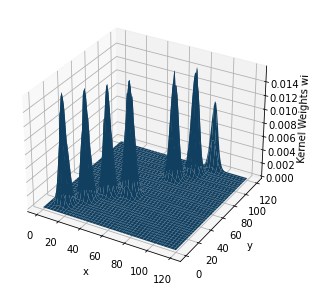

In [18]:
gkr.visualize_kernels()

In [19]:
%%time
gkr.predict([50,52])

Wall time: 0 ns


2033.4977569484809

In [20]:
%%time
gkr.predict([20,40])

Wall time: 0 ns


2563.0861673819354